# salary prediction


problem:given a dataset which captures gross salary from july 2013 through jun,2014 and includes only those employees who were employedmin june,2014. predict salaries for the employee in blatimore

In [1]:
#import libraries for analysis
import pandas as pd
import numpy as np
#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import libaries for train test split
from sklearn.model_selection import train_test_split

#import library for scaling(standardization)
from sklearn.preprocessing import StandardScaler

#Import library for model building
from sklearn.linear_model import LinearRegression

#supress warnings
import warnings
warnings.filterwarnings('ignore')

#  importing dataset

  

the data set in the csv format and can be imported using method available in padas library

In [2]:
salary = pd.read_csv('trainfile.csv')

In [3]:
salary


,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


# data cleaning and preparation

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [5]:
salary_cpy =salary.copy()

In [6]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [7]:
#since Name ha leading space we need to remove it.
salary_cpy.columns=salary.columns.str.strip()

In [8]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
#check for null values
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [10]:
#drop hiredate column
salary_cpy = salary_cpy.dropna(subset=['HireDate'])

In [11]:
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [12]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [13]:
#gross pay is dependent on the anula salary
#both the things are interrelated only.
#so, we can delete Grosspay column and it contains many null values as well.
#lets drop gross pay column
salary_cpy =salary_cpy.drop('GrossPay',axis=1)

In [14]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary'], dtype='object')

In [15]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02503      1
W02596      1
A64005      1
A65113      1
W02695      1
Name: AgencyID, Length: 1177, dtype: int64

there are 1177 agencies in blatimore.AS per general understanding Agency id represents agency so we sholud hav eth same number of agencies as well.

In [16]:
#value_count for agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
M-R Labor Commissioner         6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64

In [17]:
#one agency must be having multiple agency ids
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                 4817
POLICE OFFICER                 1866
LABORER (Hourly)                597
EMT Firefighter Suppression     358
CROSSING GUARD                  337
                               ... 
DIR EARLY INTERVENTION SVCS       1
Marine Pilot ALS                  1
PC COORDINATOR LIBRARY            1
Database Specialist               1
ANIMAL CONTROL INVESTIGATOR       1
Name: JobTitle, Length: 1073, dtype: int64

In [18]:
#value counts on HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
12/13/1976       1
11/14/1985       1
05/01/2012       1
10/18/2011       1
10/29/1984       1
Name: HireDate, Length: 4737, dtype: int64

In [19]:
#Removing $ from anual salary and converting it into float
salary_cpy['AnnualSalary']=salary_cpy['AnnualSalary'].apply(lambda x :(float)(str(x)[1:]))

In [20]:
salary_cpy['AnnualSalary'].value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [21]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x: (int)(str(x[3:5])))

In [22]:
salary_cpy['HireDay']

0        10
1        24
2        25
3        23
4        24
         ..
18976    21
18977    21
18978    17
18979    23
18980    15
Name: HireDay, Length: 18911, dtype: int64

In [23]:
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x[0:2])))

In [24]:
salary_cpy['HireMonth']

0         6
1        10
2         9
3         7
4         7
         ..
18976     5
18977     5
18978    12
18979     1
18980    10
Name: HireMonth, Length: 18911, dtype: int64

In [25]:
salary_cpy.HireDate


0        06/10/2013
1        10/24/1979
2        09/25/2006
3        07/23/2009
4        07/24/2013
            ...    
18976    05/21/2014
18977    05/21/2014
18978    12/17/2013
18979    01/23/2013
18980    10/15/1979
Name: HireDate, Length: 18911, dtype: object

In [26]:
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x[6:10])))
salary_cpy['HireYear']

0        2013
1        1979
2        2006
3        2009
4        2013
         ... 
18976    2014
18977    2014
18978    2013
18979    2013
18980    1979
Name: HireYear, Length: 18911, dtype: int64

In [27]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,23,1,2013


In [28]:
#triming all catagorical columns to make sure that there are no spaces or double quotes in the words

In [29]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x : (str(x).strip().replace("  "," ")))

In [30]:
salary_cpy['JobTitle']

0                       AIDE BLUE CHIP
1        Facilities/Office Services II
2           ASSISTANT STATE'S ATTORNEY
3                       EPIDEMIOLOGIST
4               POLICE OFFICER TRAINEE
                     ...              
18976                   AIDE BLUE CHIP
18977                   AIDE BLUE CHIP
18978           POLICE OFFICER TRAINEE
18979                   POLICE OFFICER
18980     Waste Water Tech Supv I Pump
Name: JobTitle, Length: 18911, dtype: object

In [31]:
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x : (str(x).strip().replace("  "," ")))
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x : (str(x).strip().replace("  "," ")))

In [32]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,44104.0,23,1,2013


In [33]:
#these thre catagorical columns containd mix of upper,lower cases there fore tconvert all of them into upper case

In [34]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x: (str(x).upper()))

In [35]:
salary_cpy['AgencyID'] =salary_cpy['AgencyID'].apply(lambda x :(str(x).upper()))

In [36]:
salary_cpy['Agency'] =salary_cpy['Agency'].apply(lambda x :(str(x).upper()))

In [37]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,POLICE DEPARTMENT,01/23/2013,44104.0,23,1,2013


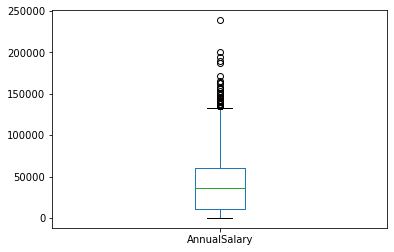

In [38]:
#the last step is to deal with outliers
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [39]:
#there are some outliers after 13,0000, we need to eliminate them

In [40]:
#summary stat of AnnualSalary
salary_cpy['AnnualSalary'].describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

In [41]:
#delete the those data  whose salary is  greater than 150000

In [42]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary'] <150000]

In [43]:
salary_cpy

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,POLICE DEPARTMENT,01/23/2013,44104.0,23,1,2013


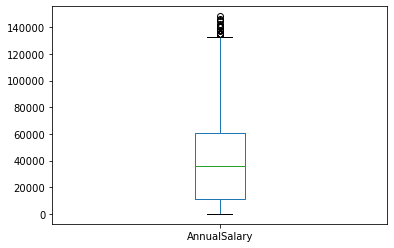

In [44]:
salary_cpy['AnnualSalary'].plot.box()
plt.show()

# Data Preparation is done

In [45]:
#check the distribution of the data using displot

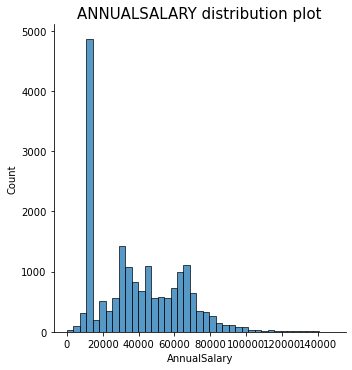

In [46]:
sns.displot(salary_cpy.AnnualSalary)
plt.title('ANNUALSALARY distribution plot',fontsize=15)
plt.show()

In [47]:
#the data is disstributed very randomly and the there are a very few values after the 10,0000

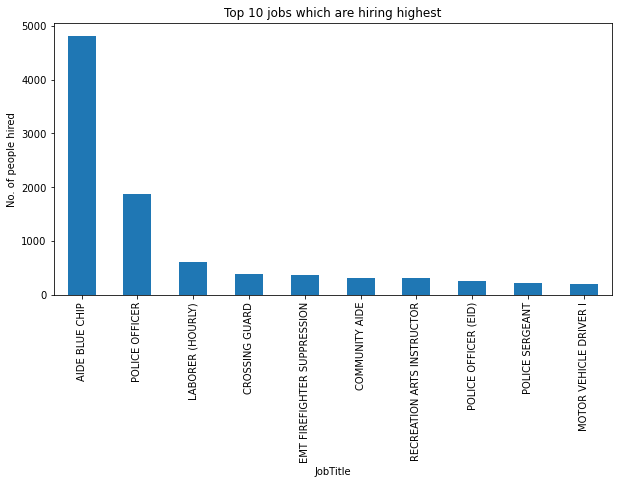

In [48]:
#which particular job is in momre demand
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No. of people hired')
plt.title("Top 10 jobs which are hiring highest")
plt.show()

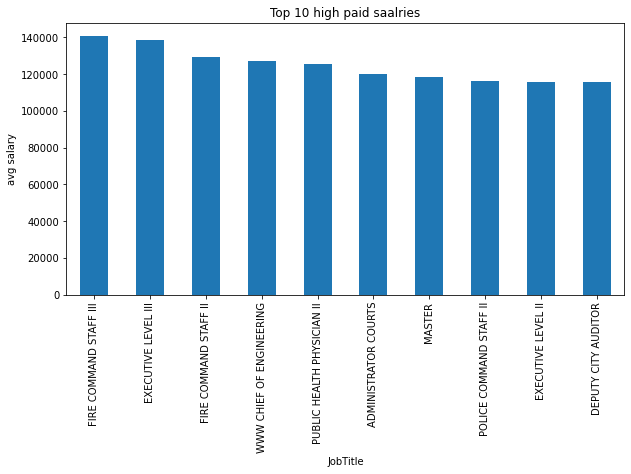

In [49]:
#top 10 jobs that fetch high salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('avg salary')
plt.title("Top 10 high paid saalries")
plt.show()

In [50]:
#number of jobs whose avg salary is more than avg salary of the company
mean_salary = salary_cpy['AnnualSalary'].mean()

In [51]:
mean_salary

39547.805098703364

In [52]:
good_paying_jobs = salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_salary]['JobTitle'].count()

798

In [53]:
good_paying_jobs


,JobTitle,AnnualSalary
0,911 LEAD OPERATOR,47886.000000
1,911 OPERATOR,42835.743590
2,911 OPERATOR SUPERVISOR,54797.500000
3,ACCOUNT EXECUTIVE,42960.000000
4,ACCOUNTANT I,46316.642857
...,...,...
1050,ZONING ADMINISTRATOR,82100.000000
1051,ZONING APPEALS ADVISOR BMZA,59274.000000
1052,ZONING ENFORCEMENT OFFICER,62000.000000
1053,ZONING EXAMINER I,43674.000000


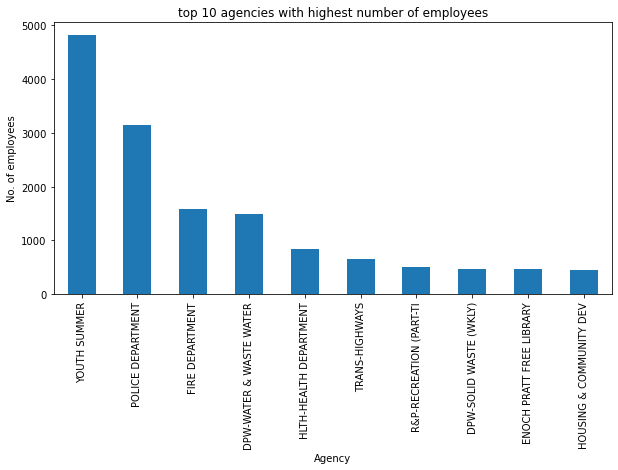

In [54]:
#check top 10 agencies with highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No. of employees')
plt.title("top 10 agencies with highest number of employees")

plt.show()

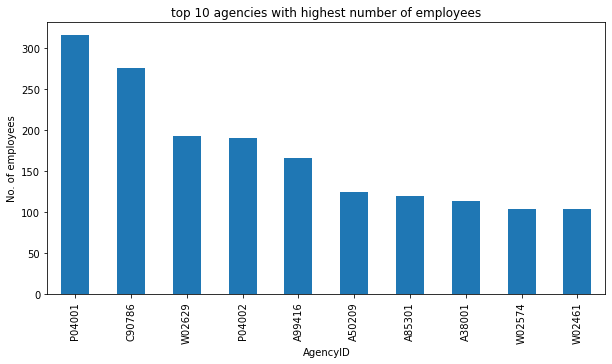

In [55]:
#check witch year hired employee have lowest salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['AnnualSalary'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No. of employees')
plt.title("top 10 agencies with highest number of employees")

plt.show()

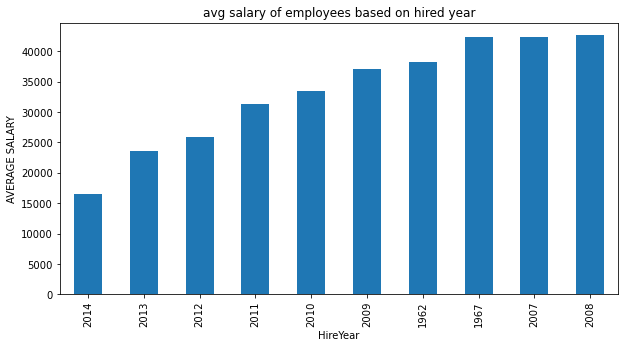

In [56]:
#in which year the people hired are have lowest salries
#this is to check wether woth experience salaries are increasing or decresing
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values(ascending=True).head(10).plot.bar()
plt.ylabel('AVERAGE SALARY')
plt.title('avg salary of employees based on hired year')
plt.show()

the abow trend shows that the with incresing of experience salaries are also incresing
now let us calcuclate experience in date with agency

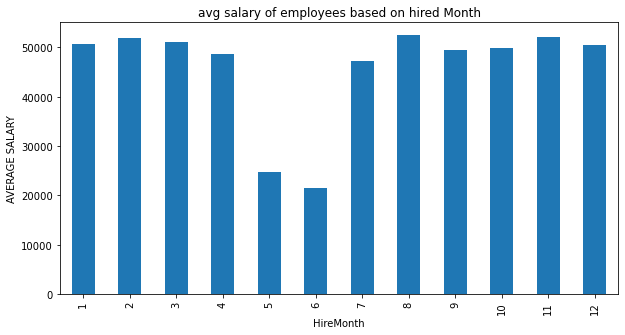

In [57]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('AVERAGE SALARY')
plt.title('avg salary of employees based on hired Month')
plt.show()

generally no relation between hiredmonth like people hired in particular month will get higher salries
therefore in months 5,6 actually the hiring is less so,annual salary mean is also less.

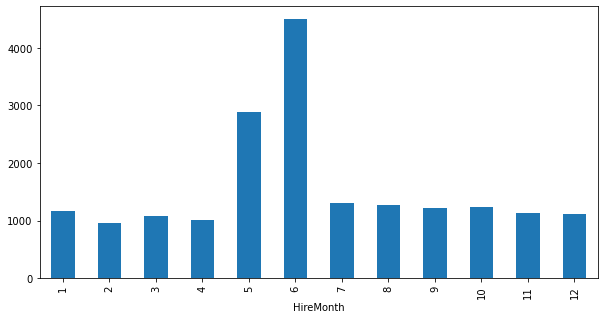

In [58]:
#in which month more people were hired
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.show()

even though the raltion between month and salary is not exatly there 
it is showing that the people hired in may,june have relatively less Annual salaries
**this is because may be the companies budget is low at that time
**some particulat agency did aggressive hiring with less salaries like that
we may assume

<Figure size 720x360 with 0 Axes>

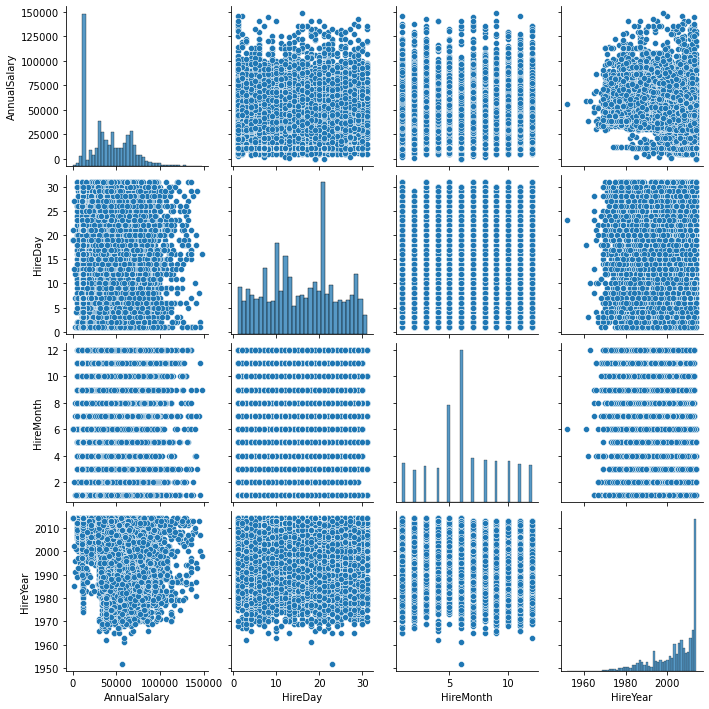

In [59]:
plt.figure(figsize=(10,5))
sns.pairplot(salary_cpy)
plt.show()

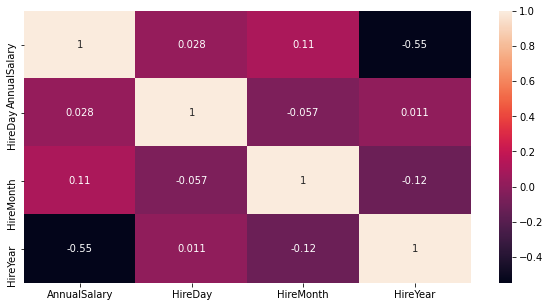

In [60]:
# in pairplot no usefull trend is observed
#let us see the heatmap correalion
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)
plt.show()

# Feature Engineering

In [61]:
salary_master = salary_cpy.copy()

In [62]:
salary_master

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,POLICE DEPARTMENT,01/23/2013,44104.0,23,1,2013


In [63]:

job_mean = salary_master.groupby(['JobTitle'])['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(job_mean)

In [64]:
salary_master

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,W02235,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,W02629,YOUTH SUMMER,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,A99416,POLICE DEPARTMENT,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,A99262,POLICE DEPARTMENT,01/23/2013,44104.0,23,1,2013


In [65]:
job_mean = salary_master.groupby(['Agency'])['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(job_mean)
salary_master

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,W02200,11313.967200,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,A03031,51495.424242,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,A29005,64874.560224,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,A65026,39980.900360,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,A99416,61506.879579,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,W02235,11313.967200,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,W02629,11313.967200,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,A99416,61506.879579,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,A99262,61506.879579,01/23/2013,44104.0,23,1,2013


In [66]:
job_mean = salary_master.groupby(['AgencyID'])['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(job_mean)
salary_master

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",11313.967200,11310.000000,11313.967200,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",47443.500000,46667.000000,51495.424242,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",69750.666667,65926.133333,64874.560224,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",57940.000000,48071.851064,39980.900360,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",44531.160494,44012.307229,61506.879579,07/24/2013,43999.0,24,7,2013
...,...,...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",11313.967200,11310.000000,11313.967200,05/21/2014,11310.0,21,5,2014
18977,"Zotamou,Pivot D",11313.967200,11310.000000,11313.967200,05/21/2014,11310.0,21,5,2014
18978,"Zovistoski,Zachary D",44531.160494,44012.307229,61506.879579,12/17/2013,43999.0,17,12,2013
18979,"Zubyk,Stanislav T",60588.139335,60203.340426,61506.879579,01/23/2013,44104.0,23,1,2013


In [67]:
#if the name is this or hiredate is this we can't say the salary predictions
#therefore we can drop these columns

In [68]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [69]:
salary_master=salary_master.drop(['Name','HireDate'],axis=1)

In [70]:
salary_master.describe()

,JobTitle,AgencyID,Agency,AnnualSalary,HireDay,HireMonth,HireYear
count,18895.000000,18895.000000,18895.000000,18895.000000,18895.000000,18895.000000,18895.000000
mean,39547.805099,39547.805099,39547.805099,39547.805099,15.764806,6.369675,2004.078328
std,24334.836706,22262.883593,20995.823011,24865.587864,8.386260,2.948706,10.391949
min,2000.000000,2000.000000,10234.535294,0.000000,1.000000,1.000000,1952.000000
25%,11313.967200,11310.000000,11313.967200,11310.000000,9.000000,5.000000,1998.000000
50%,36021.633333,41508.800000,42565.513078,36203.000000,16.000000,6.000000,2007.000000
75%,60588.139335,59711.333333,61506.879579,60300.000000,22.000000,8.000000,2013.000000
max,140885.000000,142700.000000,86492.300000,148200.000000,31.000000,12.000000,2014.000000


# Train Test split

In [71]:
salary_train,salary_test = train_test_split(salary_master,train_size=0.7,random_state=10)

In [72]:
salary_train.shape

(13226, 7)

In [73]:
salary_test.shape

(5669, 7)

In [74]:
#dividing train set into dependent and independent variables
y_train = salary_train.pop('AnnualSalary')
x_train = salary_train

In [75]:
#divinding test set into dependent and independent variables
y_test = salary_master.pop('AnnualSalary')
x_test =salary_master

In [76]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
18885,29925.666667,30453.823529,31594.490526,1,11,2006
9334,70175.000000,56042.647059,42565.513078,16,7,1979
12385,23309.565217,22019.629747,21236.522682,19,6,2014
6334,11522.106952,10272.043478,10234.535294,27,12,2007
2226,11313.967200,11310.000000,11313.967200,1,6,2014
...,...,...,...,...,...,...
9450,31608.603175,30675.719298,31594.490526,2,4,2012
7368,11313.967200,11310.000000,11313.967200,29,5,2014
17812,11313.967200,11310.000000,11313.967200,10,6,2013
7370,34301.866667,41730.721519,45763.305913,3,6,2004


In [77]:
x_train = pd.DataFrame(x_train,columns=['JobTitle','AgencyID','Agency','HireDay','HireMonth','HireYear'])

# Feature Scaling

In [78]:
#machine can't understand the values as this is month,this is day sy=uch that it can only see the numerical value


# standrdization

In [79]:
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])
x_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,1.882746e-16,3.670636e-16,5.224579e-17,-1.118701e-16,5.373997e-17,2.903519e-15
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.538203e+00,-1.680585e+00,-1.389422e+00,-1.760397e+00,-1.817891e+00,-4.132876e+00
25%,-1.156127e+00,-1.263457e+00,-1.338114e+00,-8.023521e-01,-4.598122e-01,-5.823428e-01
50%,-1.449814e-01,8.818958e-02,1.473413e-01,3.593756e-02,-1.202925e-01,2.813004e-01
75%,8.651930e-01,9.053854e-01,1.047667e+00,7.544715e-01,5.587467e-01,8.570625e-01
max,4.159122e+00,4.623381e+00,2.235280e+00,1.832273e+00,1.916825e+00,9.530229e-01


In [80]:
x_train.mean()

JobTitle     1.882746e-16
AgencyID     3.670636e-16
Agency       5.224579e-17
HireDay     -1.118701e-16
HireMonth    5.373997e-17
HireYear     2.903519e-15
dtype: float64

In [81]:
x_train.std()

JobTitle     1.000038
AgencyID     1.000038
Agency       1.000038
HireDay      1.000038
HireMonth    1.000038
HireYear     1.000038
dtype: float64

In [82]:
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
18885,-0.392640,-0.405731,-0.374136,-1.760397,1.577306,0.185340
9334,1.258464,0.740759,0.147341,0.035938,0.219227,-2.405590
12385,-0.664045,-0.783619,-0.866473,0.395205,-0.120293,0.953023
6334,-1.147588,-1.309962,-1.389422,1.353250,1.916825,0.281300
2226,-1.156127,-1.263457,-1.338114,-1.760397,-0.120293,0.953023
...,...,...,...,...,...,...
9450,-0.323602,-0.395789,-0.374136,-1.640642,-0.799332,0.761102
7368,-1.156127,-1.263457,-1.338114,1.592761,-0.459812,0.953023
17812,-1.156127,-1.263457,-1.338114,-0.682596,-0.120293,0.857063
7370,-0.213120,0.099523,0.299340,-1.520886,-0.120293,-0.006581


In [83]:
x_train.mean()

JobTitle     1.882746e-16
AgencyID     3.670636e-16
Agency       5.224579e-17
HireDay     -1.118701e-16
HireMonth    5.373997e-17
HireYear     2.903519e-15
dtype: float64

In [84]:
x_train.std()

JobTitle     1.000038
AgencyID     1.000038
Agency       1.000038
HireDay      1.000038
HireMonth    1.000038
HireYear     1.000038
dtype: float64

In [85]:
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

In [86]:
x_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.889500e+04,1.889500e+04,1.889500e+04,1.889500e+04,1.889500e+04,1.889500e+04
mean,-9.544275e-16,-6.439294e-16,-2.053619e-16,-1.646863e-16,-4.182477e-16,-8.016239e-15
std,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00,1.000026e+00
min,-1.543006e+00,-1.686610e+00,-1.396185e+00,-1.760641e+00,-1.821076e+00,-5.011544e+00
25%,-1.160254e+00,-1.268414e+00,-1.344772e+00,-8.066748e-01,-4.645125e-01,-5.849229e-01
50%,-1.449061e-01,8.808593e-02,1.437328e-01,2.804596e-02,-1.253717e-01,2.811551e-01
75%,8.646407e-01,9.057255e-01,1.045906e+00,7.435209e-01,5.529099e-01,8.585405e-01
max,4.164395e+00,4.633493e+00,2.235956e+00,1.816733e+00,1.909473e+00,9.547714e-01


In [87]:
x_test

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
0,-1.160254,-1.268414,-1.344772,-0.687429,-0.125372,0.858540
1,0.324469,0.319787,0.569062,0.982013,1.231191,-2.413310
2,1.241170,1.184888,1.206308,1.101258,0.892051,0.184924
3,0.755817,0.382892,0.020628,0.862767,0.213769,0.473617
4,0.204788,0.200541,1.045906,0.982013,0.213769,0.858540
...,...,...,...,...,...,...
18976,-1.160254,-1.268414,-1.344772,0.624275,-0.464512,0.954771
18977,-1.160254,-1.268414,-1.344772,0.624275,-0.464512,0.954771
18978,0.204788,0.200541,1.045906,0.147292,1.909473,0.858540
18979,0.864641,0.927826,1.045906,0.862767,-1.821076,0.858540


# building linear regression model

In [88]:
#small example that how linear regression works
example_df = pd.DataFrame({'performance':[1,2,3,4,5,6],'levels':[2,5,4,6,1,3],'target':[100,300,200,600,200,300]})

In [89]:
example_df

,performance,levels,target
0,1,2,100
1,2,5,300
2,3,4,200
3,4,6,600
4,5,1,200
5,6,3,300


In [90]:
example_lr = LinearRegression()
example_model = example_lr.fit(example_df[['performance','levels']],example_df['target'])

In [91]:
example_model.score(example_df[['performance','levels']],example_df['target'])

0.8106741573033707

In [92]:
example_model.predict([[6,3]])

array([350.83333333])

In [93]:
print(example_lr.coef_)

[42.5 77.5]


In [94]:
print(example_lr.intercept_)

-136.66666666666657


# applying linear regression model on actual data

In [95]:
lr = LinearRegression()

In [96]:
y_train

18885    29245.0
9334     73600.0
12385    20800.0
6334     10038.0
2226     11310.0
          ...   
9450     30014.0
7368     11310.0
17812    11310.0
7370     34211.0
17757    81120.0
Name: AnnualSalary, Length: 13226, dtype: float64

In [97]:
salary_reg = lr.fit(x_train,y_train)

In [98]:
salary_reg.score(x_train,y_train)

0.9645650195969258

In [99]:
salary_reg.score(x_test,y_test)

0.9644325452984334

In [100]:
 print(lr.coef_)

[22216.70188463  3040.62809567 -1911.61726969   -42.88990943
  -141.06309572 -2134.90621668]


In [101]:
print(salary_reg.intercept_)

39473.00894072282


In [102]:
y_predict = salary_reg.predict(x_test)

In [103]:
y_predict

array([10624.17674584, 51502.56337552, 67776.64614772, ...,
       40524.54898328, 57891.2554326 , 57189.25709091])

In [104]:
y_test

0        11310.0
1        53428.0
2        68300.0
3        62000.0
4        43999.0
          ...   
18976    11310.0
18977    11310.0
18978    43999.0
18979    44104.0
18980    53568.0
Name: AnnualSalary, Length: 18895, dtype: float64

In [105]:
salary_master

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
0,-1.160254,-1.268414,-1.344772,-0.687429,-0.125372,0.858540
1,0.324469,0.319787,0.569062,0.982013,1.231191,-2.413310
2,1.241170,1.184888,1.206308,1.101258,0.892051,0.184924
3,0.755817,0.382892,0.020628,0.862767,0.213769,0.473617
4,0.204788,0.200541,1.045906,0.982013,0.213769,0.858540
...,...,...,...,...,...,...
18976,-1.160254,-1.268414,-1.344772,0.624275,-0.464512,0.954771
18977,-1.160254,-1.268414,-1.344772,0.624275,-0.464512,0.954771
18978,0.204788,0.200541,1.045906,0.147292,1.909473,0.858540
18979,0.864641,0.927826,1.045906,0.862767,-1.821076,0.858540


In [112]:
#print('r2 socre is ',salary_reg.score)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('mean_sqrd_error is==',mean_squared_error(y_test,y_predict))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_predict)))
print('mean_absolute_error is==',mean_absolute_error(y_test,y_predict))
print("score =",salary_reg.score(x_test,y_test))

mean_sqrd_error is== 21990103.027458932
root_mean_squared error of is== 4689.360620325433
mean_absolute_error is== 2610.5816571445794
score = 0.9644325452984334
